In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.ticker as mtick

df = pd.read_csv('data/pattern_data.csv')

df

,is_hit,is_visualization,is_dash,start_distance,start_delay,pre_delay,mid_delay,post_delay,attack_size,attack_pattern,attack_count
0,0,1,0,724,0.605,0.206,0.432,0.171,209,5,4
1,1,0,1,834,0.201,0.167,0.220,0.319,189,1,5
2,1,0,0,745,0.539,0.234,0.835,0.415,190,2,6
3,0,1,0,826,0.333,0.368,0.792,0.188,187,4,7
4,1,0,1,1132,0.768,0.632,0.494,0.350,215,3,8
...,...,...,...,...,...,...,...,...,...,...,...
1449,1,1,0,781,0.682,0.252,0.114,0.103,189,5,3
1450,1,1,0,1464,0.659,0.108,0.764,0.162,268,3,4
1451,0,0,0,1029,0.343,0.264,0.241,0.375,210,1,5
1452,1,0,0,529,0.552,0.606,0.539,0.322,242,2,6


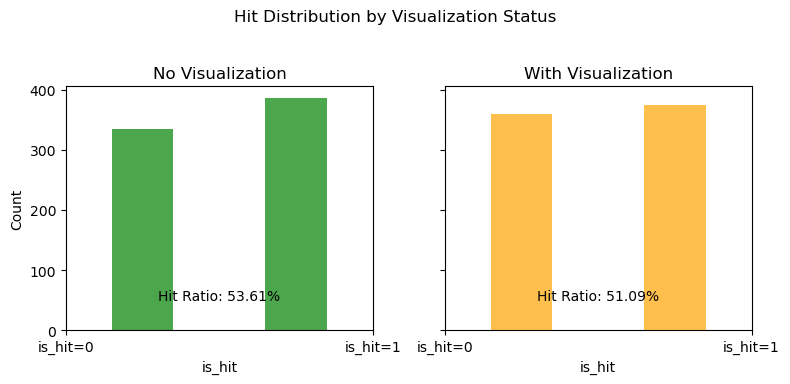

,is_hit = 0,is_hit = 1,sum
is_visual = 0,334,386,720
is_visual = 1,359,375,734


In [25]:
data_no_visual = df[df['is_visualization'] == 0]
data_visual = df[df['is_visualization'] == 1]

no_visual_hit_ratio = data_no_visual['is_hit'].mean()
visual_hit_ratio = data_visual['is_hit'].mean()

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

axs[0].hist(data_no_visual['is_hit'], bins=2, color='green', alpha=0.7, rwidth=0.4)
axs[0].set_title('No Visualization')
axs[0].set_xlabel('is_hit')
axs[0].set_ylabel('Count')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['is_hit=0', 'is_hit=1'])
axs[0].text(0.5, 50, f'Hit Ratio: {no_visual_hit_ratio:.2%}', ha='center', color='black')

axs[1].hist(data_visual['is_hit'], bins=2, color='orange', alpha=0.7, rwidth=0.4)
axs[1].set_title('With Visualization')
axs[1].set_xlabel('is_hit')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['is_hit=0', 'is_hit=1'])
axs[1].text(0.5, 50, f'Hit Ratio: {visual_hit_ratio:.2%}', ha='center', color='black')

plt.suptitle('Hit Distribution by Visualization Status')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

cross_tab = pd.crosstab(df['is_visualization'], df['is_hit'])
cross_tab.index = ['is_visual = 0', 'is_visual = 1']
cross_tab.columns = ['is_hit = 0', 'is_hit = 1']

cross_tab['sum'] = cross_tab['is_hit = 0'] + cross_tab['is_hit = 1']

cross_tab

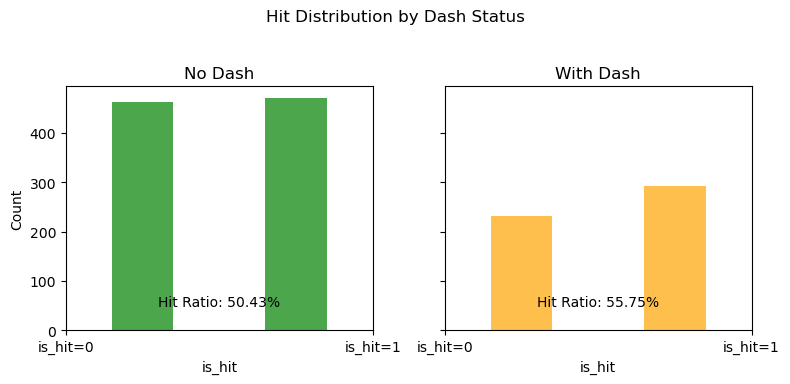

,is_hit = 0,is_hit = 1,sum
is_dash = 0,462,470,932
is_dash = 1,231,291,522


In [26]:
data_no_dash = df[df['is_dash'] == 0]
data_dash = df[df['is_dash'] == 1]

no_dash_hit_ratio = data_no_dash['is_hit'].mean()
dash_hit_ratio = data_dash['is_hit'].mean()

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

axs[0].hist(data_no_dash['is_hit'], bins=2, color='green', alpha=0.7, rwidth=0.4)
axs[0].set_title('No Dash')
axs[0].set_xlabel('is_hit')
axs[0].set_ylabel('Count')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['is_hit=0', 'is_hit=1'])
axs[0].text(0.5, 50, f'Hit Ratio: {no_dash_hit_ratio:.2%}', ha='center', color='black')

axs[1].hist(data_dash['is_hit'], bins=2, color='orange', alpha=0.7, rwidth=0.4)
axs[1].set_title('With Dash')
axs[1].set_xlabel('is_hit')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['is_hit=0', 'is_hit=1'])
axs[1].text(0.5, 50, f'Hit Ratio: {dash_hit_ratio:.2%}', ha='center', color='black')

plt.suptitle('Hit Distribution by Dash Status')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

cross_tab = pd.crosstab(df['is_dash'], df['is_hit'])
cross_tab.index = ['is_dash = 0', 'is_dash = 1']
cross_tab.columns = ['is_hit = 0', 'is_hit = 1']

cross_tab['sum'] = cross_tab['is_hit = 0'] + cross_tab['is_hit = 1']

cross_tab

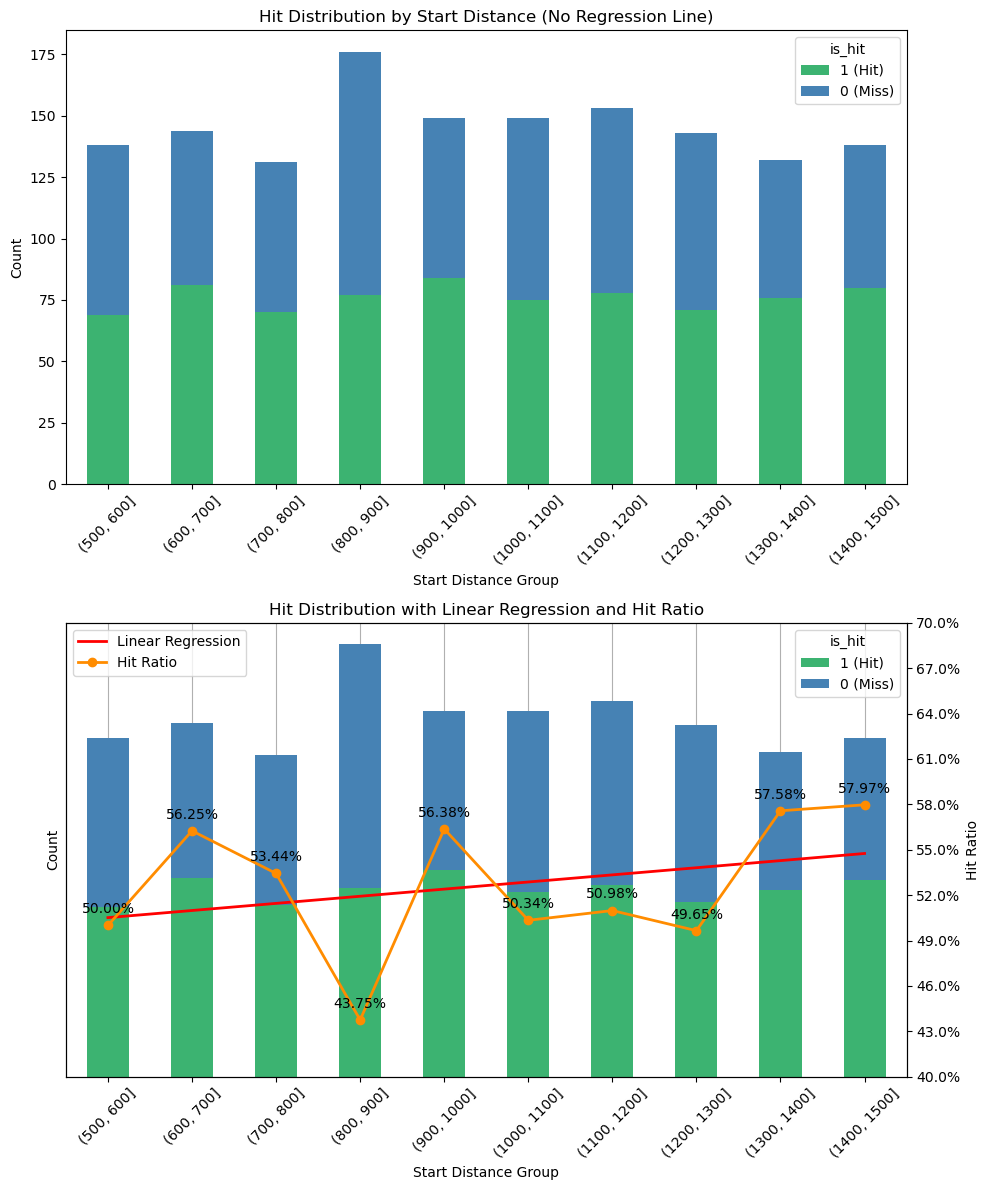

In [27]:
df['distance_group'] = pd.cut(df['start_distance'], bins=range(0, int(df['start_distance'].max()) + 100, 100))
cross_tab = pd.crosstab(df['distance_group'], df['is_hit']).drop(labels=pd.Interval(400, 500, closed='right'))

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Start Distance (No Regression Line)')
axs[0].set_xlabel('Start Distance Group')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Linear Regression 선 있는 그래프와 Hit Ratio 그래프 추가
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

x_values = np.arange(len(hit_ratios)).reshape(-1, 1)
y_values = hit_ratios.values.reshape(-1, 1)

model = LinearRegression().fit(x_values, y_values)
y_pred = model.predict(x_values)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression', zorder=4)
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.40, 0.70)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.40, 0.70, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution with Linear Regression and Hit Ratio')
axs[1].set_xlabel('Start Distance Group')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

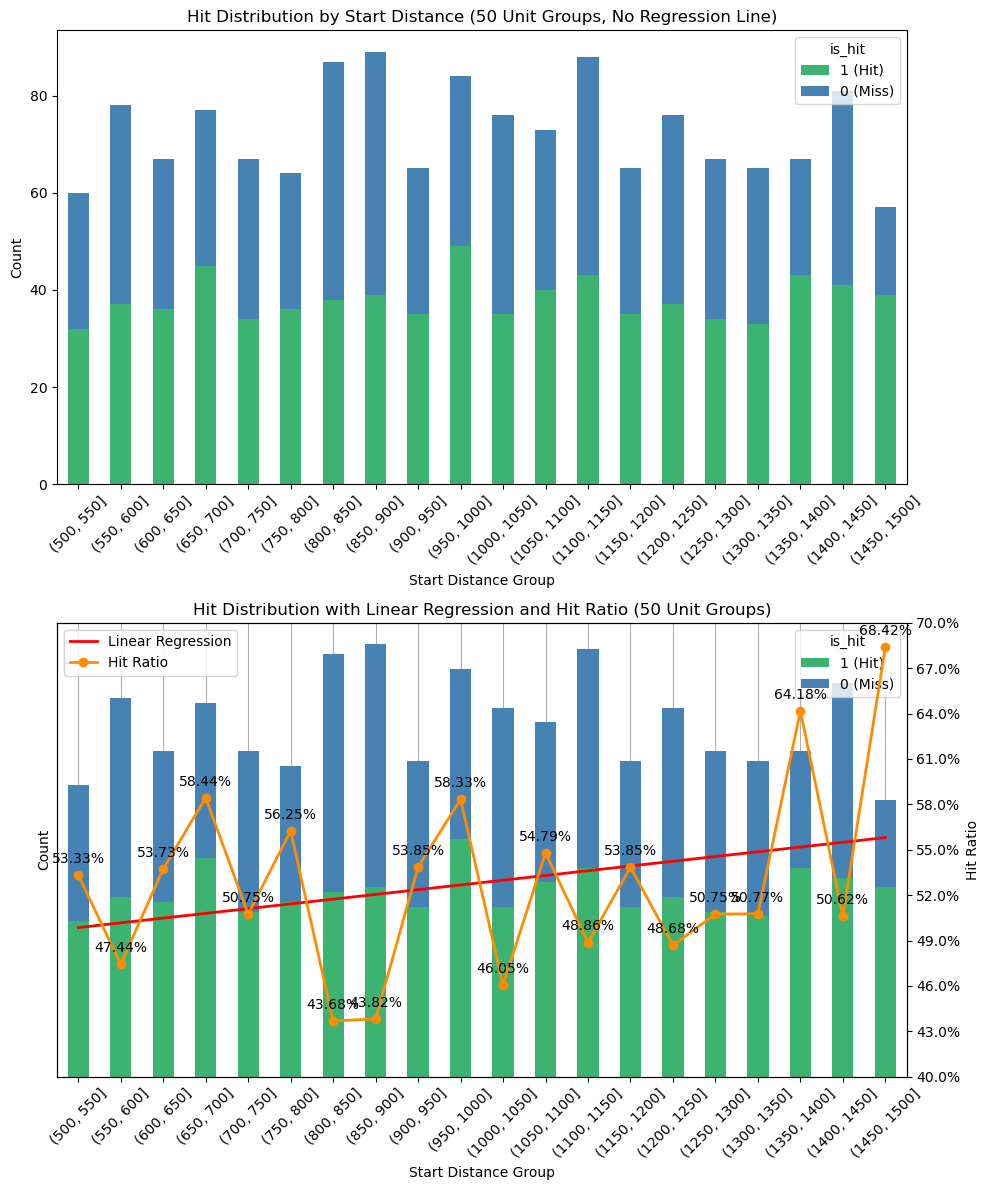

In [28]:
# start_distance를 50단위로 그룹화
df['distance_group'] = pd.cut(df['start_distance'], bins=range(0, int(df['start_distance'].max()) + 50, 50))
cross_tab = pd.crosstab(df['distance_group'], df['is_hit'])

# 450~500 그룹이 존재하면 제거
if pd.Interval(450, 500, closed='right') in cross_tab.index:
    cross_tab = cross_tab.drop(labels=pd.Interval(450, 500, closed='right'))

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Start Distance (50 Unit Groups, No Regression Line)')
axs[0].set_xlabel('Start Distance Group')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right')  # 오른쪽 상단에 표시
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Linear Regression 선 있는 그래프와 Hit Ratio 그래프 추가
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

x_values = np.arange(len(hit_ratios)).reshape(-1, 1)
y_values = hit_ratios.values.reshape(-1, 1)

model = LinearRegression().fit(x_values, y_values)
y_pred = model.predict(x_values)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression', zorder=4)
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.40, 0.70)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.40, 0.70, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution with Linear Regression and Hit Ratio (50 Unit Groups)')
axs[1].set_xlabel('Start Distance Group')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right')  # 오른쪽 상단에 표시
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

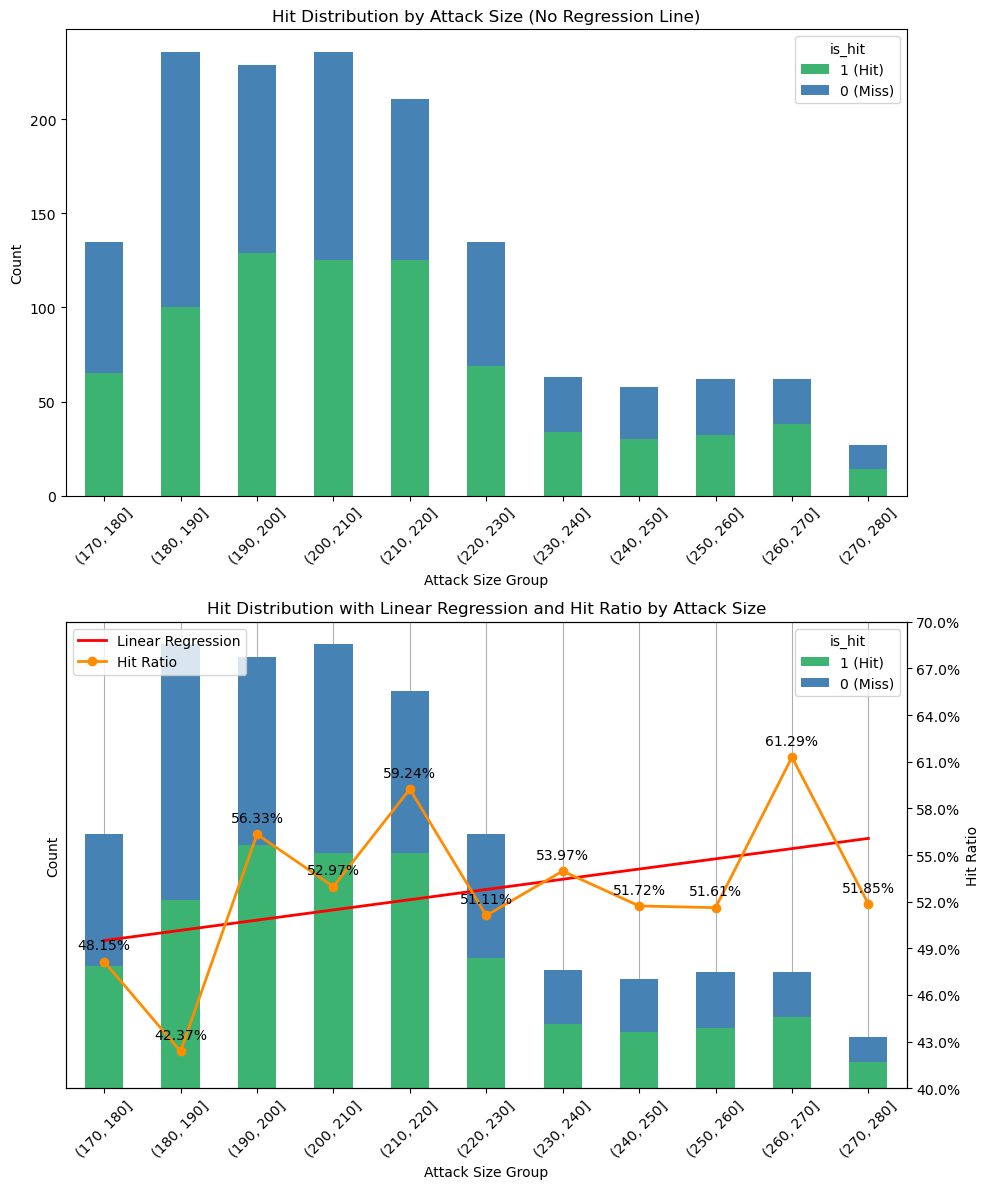

In [29]:
# attack_size를 10단위로 그룹화
df['size_group'] = pd.cut(df['attack_size'], bins=range(0, int(df['attack_size'].max()) + 10, 10))
cross_tab = pd.crosstab(df['size_group'], df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Attack Size (No Regression Line)')
axs[0].set_xlabel('Attack Size Group')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Linear Regression 선 있는 그래프와 Hit Ratio 그래프 추가
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

x_values = np.arange(len(hit_ratios)).reshape(-1, 1)
y_values = hit_ratios.values.reshape(-1, 1)

model = LinearRegression().fit(x_values, y_values)
y_pred = model.predict(x_values)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression', zorder=4)
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.40, 0.70)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.40, 0.70, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution with Linear Regression and Hit Ratio by Attack Size')
axs[1].set_xlabel('Attack Size Group')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\hyjin\AppData\Local\Temp\ipykernel_7780\2497139829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['size_group'] = pd.cut(df_filtered['attack_size'], bins=range(0, int(df_filtered['attack_size'].max()) + 5, 5))


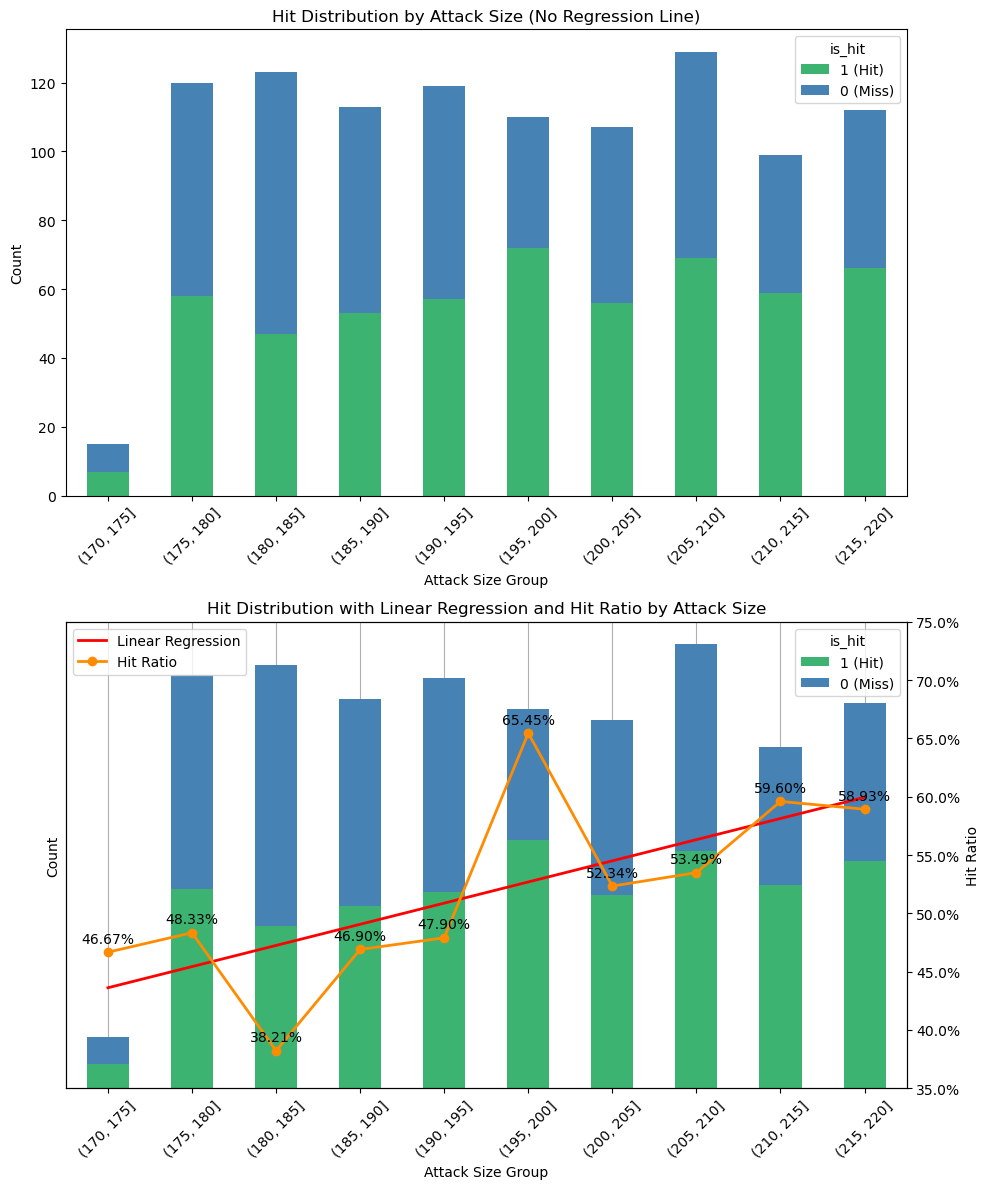

In [30]:
# attack_size가 220 이하인 데이터만 사용
df_filtered = df[df['attack_size'] <= 220]

# attack_size를 5단위로 그룹화
df_filtered['size_group'] = pd.cut(df_filtered['attack_size'], bins=range(0, int(df_filtered['attack_size'].max()) + 5, 5))
cross_tab = pd.crosstab(df_filtered['size_group'], df_filtered['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Attack Size (No Regression Line)')
axs[0].set_xlabel('Attack Size Group')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Linear Regression 선 있는 그래프와 Hit Ratio 그래프 추가
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

x_values = np.arange(len(hit_ratios)).reshape(-1, 1)
y_values = hit_ratios.values.reshape(-1, 1)

model = LinearRegression().fit(x_values, y_values)
y_pred = model.predict(x_values)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression', zorder=4)
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.35, 0.75)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.35, 0.75, 9))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution with Linear Regression and Hit Ratio by Attack Size')
axs[1].set_xlabel('Attack Size Group')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

C:\Users\hyjin\AppData\Local\Temp\ipykernel_7780\613601279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['size_group'] = pd.cut(df_filtered['attack_size'], bins=range(0, int(df_filtered['attack_size'].max()) + 5, 5))


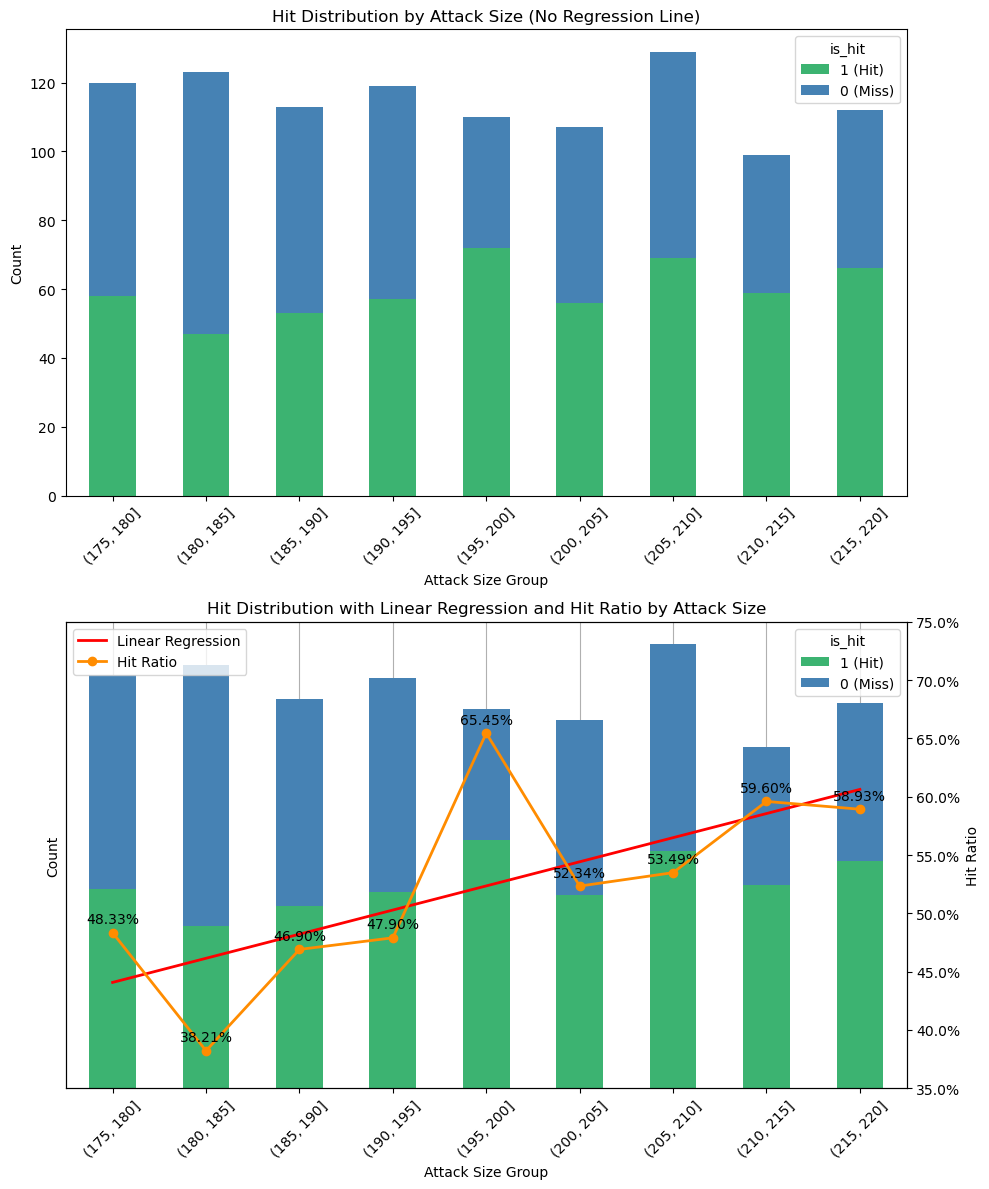

In [31]:
# attack_size가 220 이하인 데이터만 사용
df_filtered = df[df['attack_size'] <= 220]

# attack_size를 5단위로 그룹화
df_filtered['size_group'] = pd.cut(df_filtered['attack_size'], bins=range(0, int(df_filtered['attack_size'].max()) + 5, 5))
cross_tab = pd.crosstab(df_filtered['size_group'], df_filtered['is_hit'])

# 170~175 그룹 제거 (아웃라이어 처리)
cross_tab = cross_tab.drop(labels=pd.Interval(170, 175, closed='right'))

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Attack Size (No Regression Line)')
axs[0].set_xlabel('Attack Size Group')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Linear Regression 선 있는 그래프와 Hit Ratio 그래프 추가
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

x_values = np.arange(len(hit_ratios)).reshape(-1, 1)
y_values = hit_ratios.values.reshape(-1, 1)

model = LinearRegression().fit(x_values, y_values)
y_pred = model.predict(x_values)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression', zorder=4)
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.35, 0.75)  # Hit Ratio 축의 범위를 35%에서 75%로 설정
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.35, 0.75, 9))  # 35%에서 75%까지 틱 설정
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution with Linear Regression and Hit Ratio by Attack Size')
axs[1].set_xlabel('Attack Size Group')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

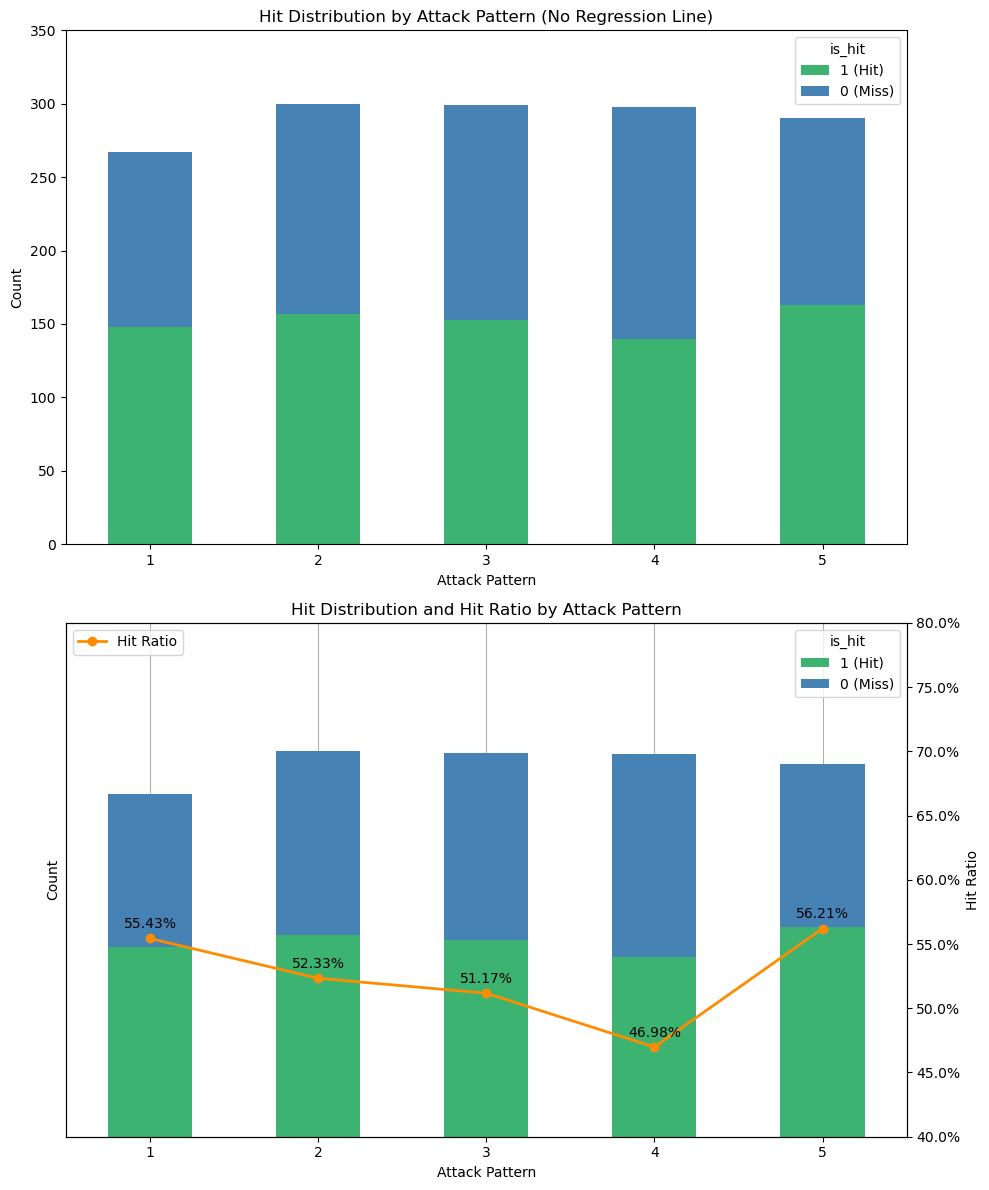

In [32]:
# attack_pattern에 대한 교차표 생성
cross_tab = pd.crosstab(df['attack_pattern'], df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Hit Distribution 막대 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Attack Pattern (No Regression Line)')
axs[0].set_xlabel('Attack Pattern')
axs[0].set_ylabel('Count')
axs[0].set_ylim(0, 350)  # y축 범위를 0에서 400까지 설정
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right')  # 범례를 오른쪽 상단에 표시
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=0)

# 두 번째 그래프: Hit Ratio 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)
axs[1].set_ylim(0, 400)  # y축 범위를 0에서 400까지 설정

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.4, 0.80)  # Hit Ratio 축의 범위를 20%에서 80%로 설정
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.4, 0.80, 9))  # 20%에서 80%까지 틱 설정
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 패턴에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio by Attack Pattern')
axs[1].set_xlabel('Attack Pattern')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right')  # 범례를 오른쪽 상단에 표시
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=0)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

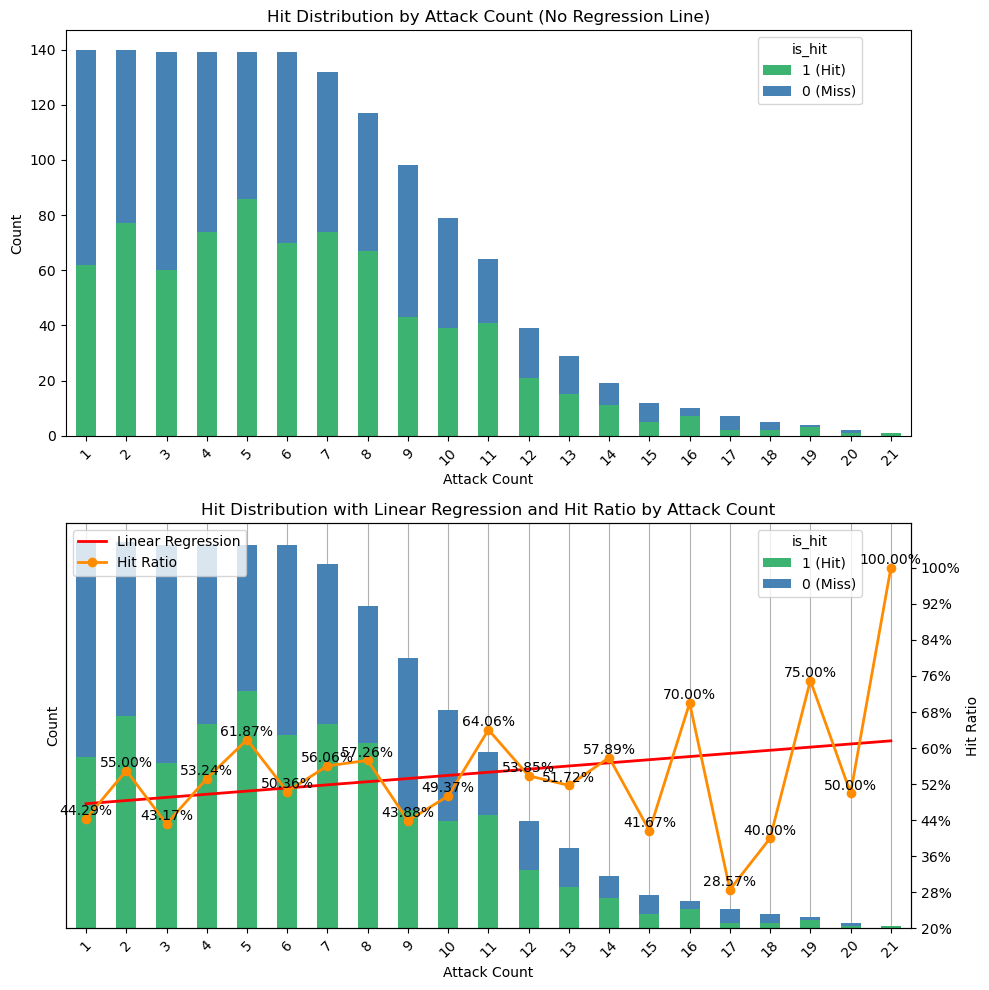

In [33]:
# attack_count에 대한 교차표 생성
cross_tab = pd.crosstab(df['attack_count'], df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Attack Count (No Regression Line)')
axs[0].set_xlabel('Attack Count')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right', bbox_to_anchor=(0.95, 1))  # 범례를 약간 왼쪽으로 이동
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Linear Regression 선 있는 그래프와 Hit Ratio 그래프 추가
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

x_values = np.arange(len(hit_ratios)).reshape(-1, 1)
y_values = hit_ratios.values.reshape(-1, 1)

model = LinearRegression().fit(x_values, y_values)
y_pred = model.predict(x_values)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression', zorder=4)
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.2, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.20, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution with Linear Regression and Hit Ratio by Attack Count')
axs[1].set_xlabel('Attack Count')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right', bbox_to_anchor=(0.95, 1))  # 범례를 약간 왼쪽으로 이동
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [34]:
mean_attack_count = df['attack_count'].mean()
print("Attack Count의 기댓값 (평균):", mean_attack_count)

Attack Count의 기댓값 (평균): 6.158872077028886


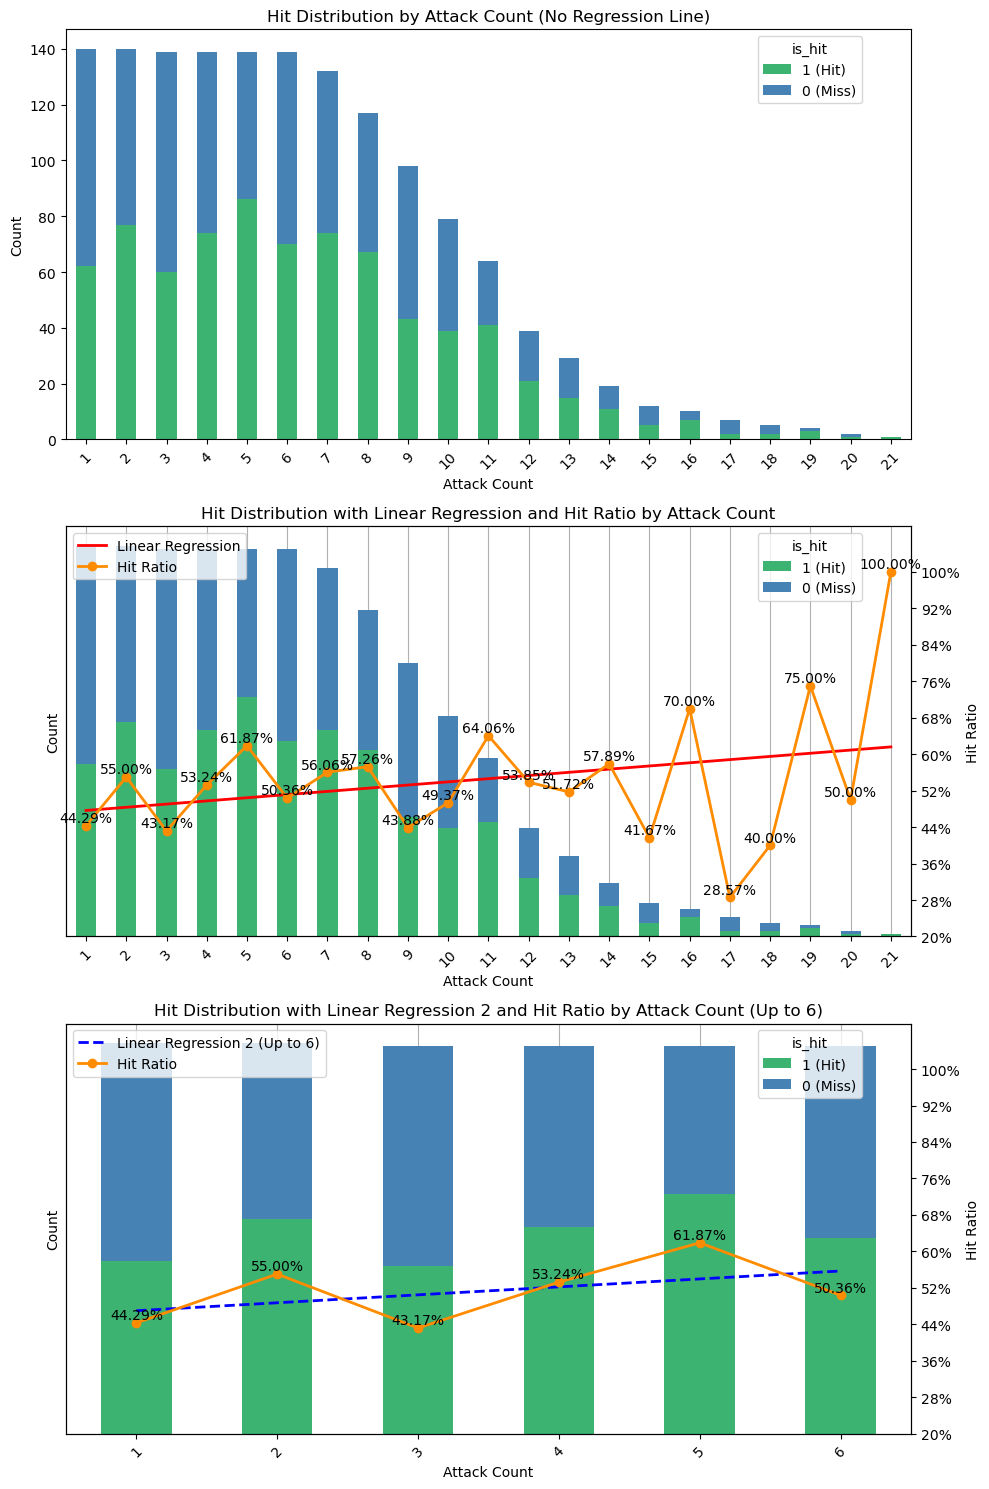

In [35]:
# attack_count에 대한 교차표 생성
cross_tab = pd.crosstab(df['attack_count'], df['is_hit'])

fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # 3개의 그래프를 위한 레이아웃

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Attack Count (No Regression Line)')
axs[0].set_xlabel('Attack Count')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right', bbox_to_anchor=(0.95, 1))
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Linear Regression 선 있는 그래프와 Hit Ratio 그래프 추가
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

x_values = np.arange(len(hit_ratios)).reshape(-1, 1)
y_values = hit_ratios.values.reshape(-1, 1)

model = LinearRegression().fit(x_values, y_values)
y_pred = model.predict(x_values)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression', zorder=4)
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.2, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.20, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution with Linear Regression and Hit Ratio by Attack Count')
axs[1].set_xlabel('Attack Count')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right', bbox_to_anchor=(0.95, 1))
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

# 세 번째 그래프: Attack Count 6까지만 포함하여 Linear Regression 2 추가
limited_cross_tab = cross_tab.loc[cross_tab.index <= 6]
limited_hit_ratios = hit_ratios[:len(limited_cross_tab)]

x_values_limited = np.arange(len(limited_hit_ratios)).reshape(-1, 1)
y_values_limited = limited_hit_ratios.values.reshape(-1, 1)

model_limited = LinearRegression().fit(x_values_limited, y_values_limited)
y_pred_limited = model_limited.predict(x_values_limited)

limited_cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[2], color=['mediumseagreen', 'steelblue'], zorder=2)

ax3 = axs[2].twinx()
ax3.plot(limited_hit_ratios.index, y_pred_limited, color='blue', linestyle='--', linewidth=2, label='Linear Regression 2 (Up to 6)', zorder=4)
ax3.plot(limited_hit_ratios.index, limited_hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax3.set_ylim(0.2, 1.1)
ax3.set_ylabel('Hit Ratio', zorder=6)
ax3.set_yticks(np.linspace(0.20, 1.0, 11))
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax3.grid(False)
axs[2].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

for i in range(len(limited_hit_ratios)):
    ax3.text(i, limited_hit_ratios[i] + 0.008, f'{limited_hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[2].set_title('Hit Distribution with Linear Regression 2 and Hit Ratio by Attack Count (Up to 6)')
axs[2].set_xlabel('Attack Count')
axs[2].set_ylabel('Count')
axs[2].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], loc='upper right', bbox_to_anchor=(0.95, 1))
axs[2].set_xticks(range(len(limited_cross_tab)))
axs[2].set_xticklabels(limited_cross_tab.index, rotation=45)
axs[2].yaxis.set_ticks([])

ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

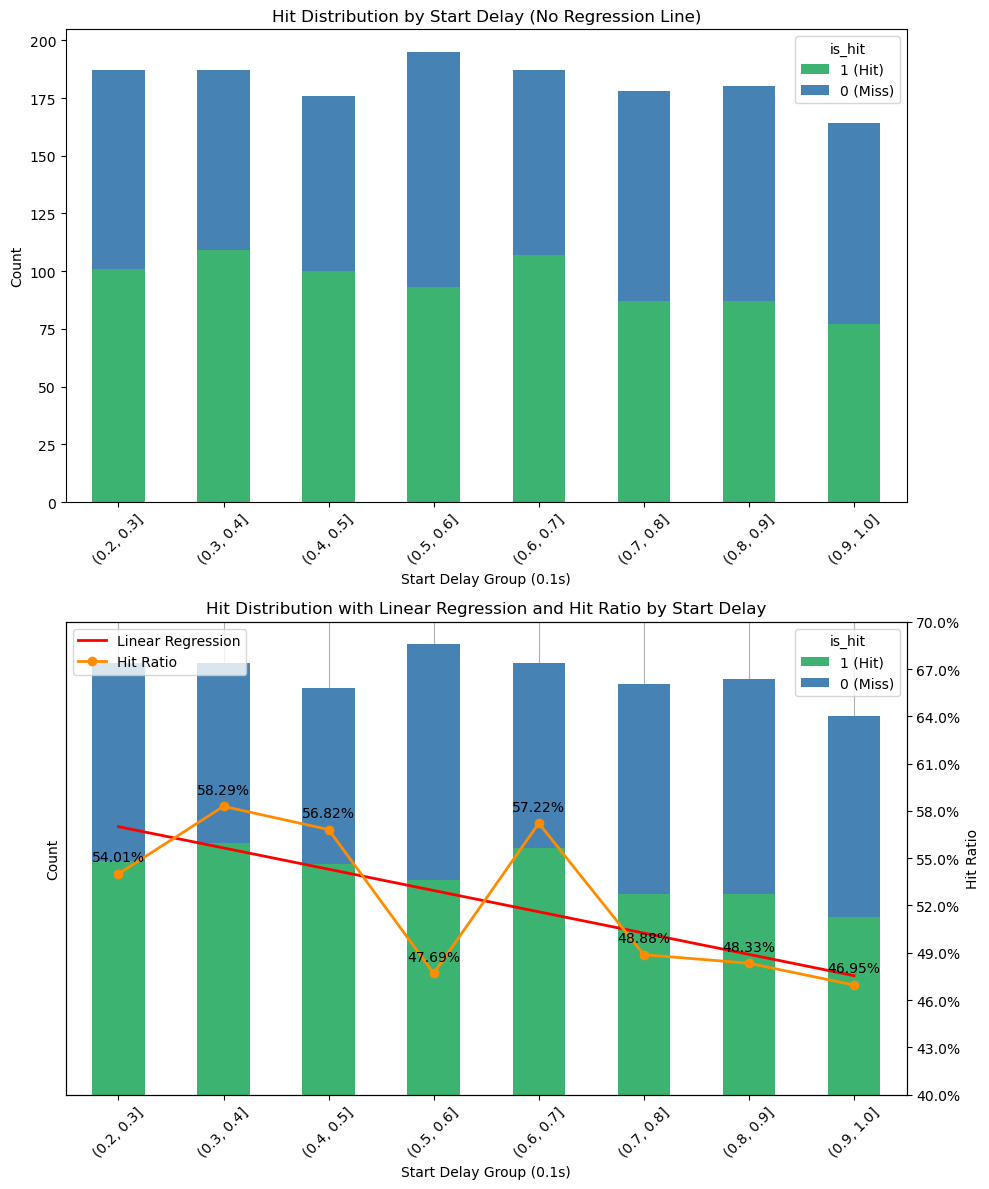

In [36]:
# start_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['start_delay'], bins=np.arange(0, df['start_delay'].max() + 0.1, 0.1))
cross_tab = pd.crosstab(df['delay_group'], df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Start Delay (No Regression Line)')
axs[0].set_xlabel('Start Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Linear Regression 선 있는 그래프와 Hit Ratio 그래프 추가
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

x_values = np.arange(len(hit_ratios)).reshape(-1, 1)
y_values = hit_ratios.values.reshape(-1, 1)

model = LinearRegression().fit(x_values, y_values)
y_pred = model.predict(x_values)

# Hit Ratio 선과 레이블을 그리되, zorder를 높게 설정
ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Regression', zorder=4)
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.40, 0.70)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.40, 0.70, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution with Linear Regression and Hit Ratio by Start Delay')
axs[1].set_xlabel('Start Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'])
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [37]:
df = df.drop(columns=['distance_group', 'size_group', 'delay_group'])

df['total_delay'] = df['pre_delay'] + df['mid_delay'] + df['post_delay']

df

,is_hit,is_visualization,is_dash,start_distance,start_delay,pre_delay,mid_delay,post_delay,attack_size,attack_pattern,attack_count,total_delay
0,0,1,0,724,0.605,0.206,0.432,0.171,209,5,4,0.809
1,1,0,1,834,0.201,0.167,0.220,0.319,189,1,5,0.706
2,1,0,0,745,0.539,0.234,0.835,0.415,190,2,6,1.484
3,0,1,0,826,0.333,0.368,0.792,0.188,187,4,7,1.348
4,1,0,1,1132,0.768,0.632,0.494,0.350,215,3,8,1.476
...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1,1,0,781,0.682,0.252,0.114,0.103,189,5,3,0.469
1450,1,1,0,1464,0.659,0.108,0.764,0.162,268,3,4,1.034
1451,0,0,0,1029,0.343,0.264,0.241,0.375,210,1,5,0.880
1452,1,0,0,529,0.552,0.606,0.539,0.322,242,2,6,1.467


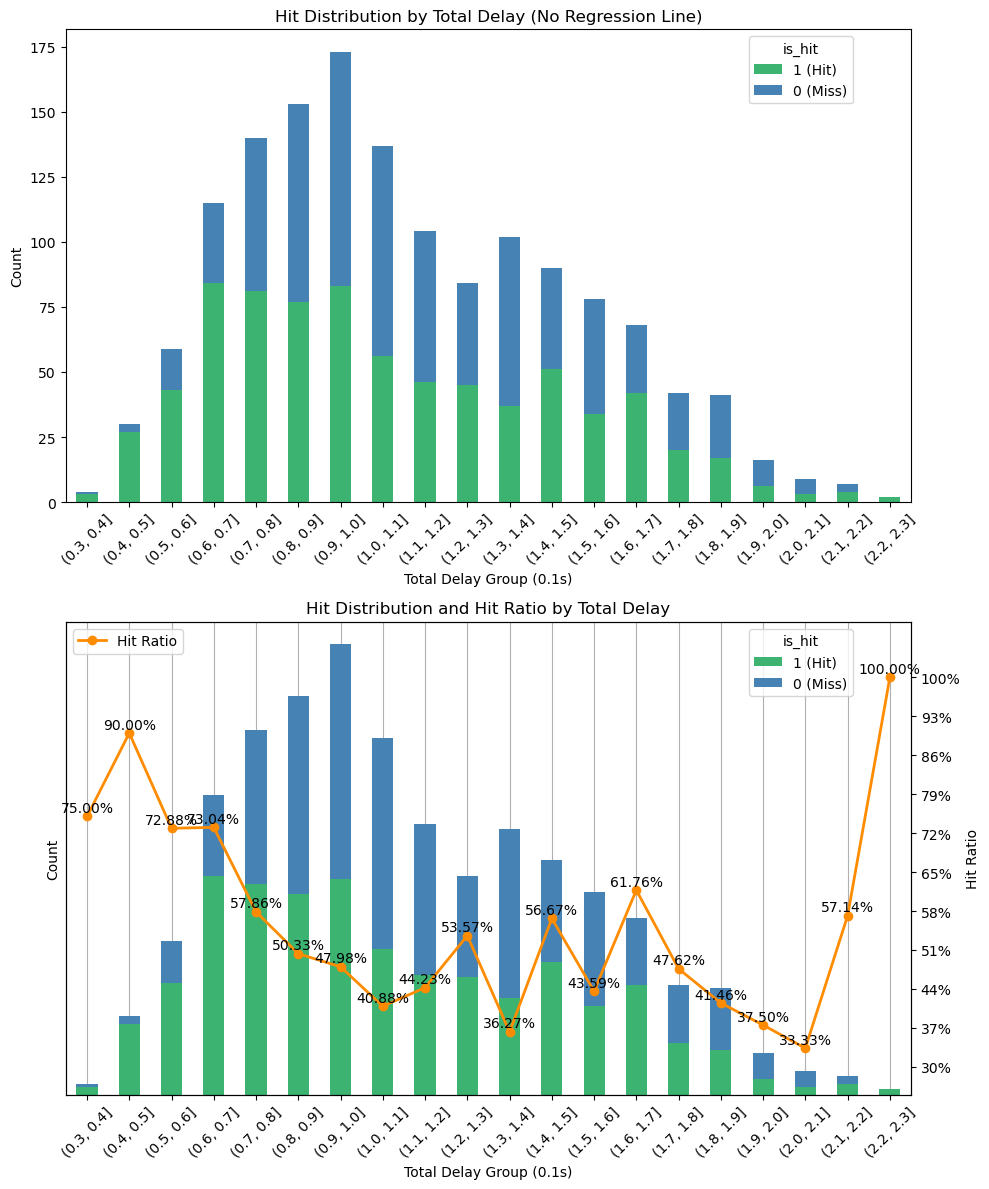

In [38]:
# total_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['total_delay'], bins=np.arange(0, df['total_delay'].max() + 0.1, 0.1))

# 교차표 생성
cross_tab = pd.crosstab(df['delay_group'], df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Total Delay (No Regression Line)')
axs[0].set_xlabel('Total Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 (Linear Regression 없음)
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio by Total Delay')
axs[1].set_xlabel('Total Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

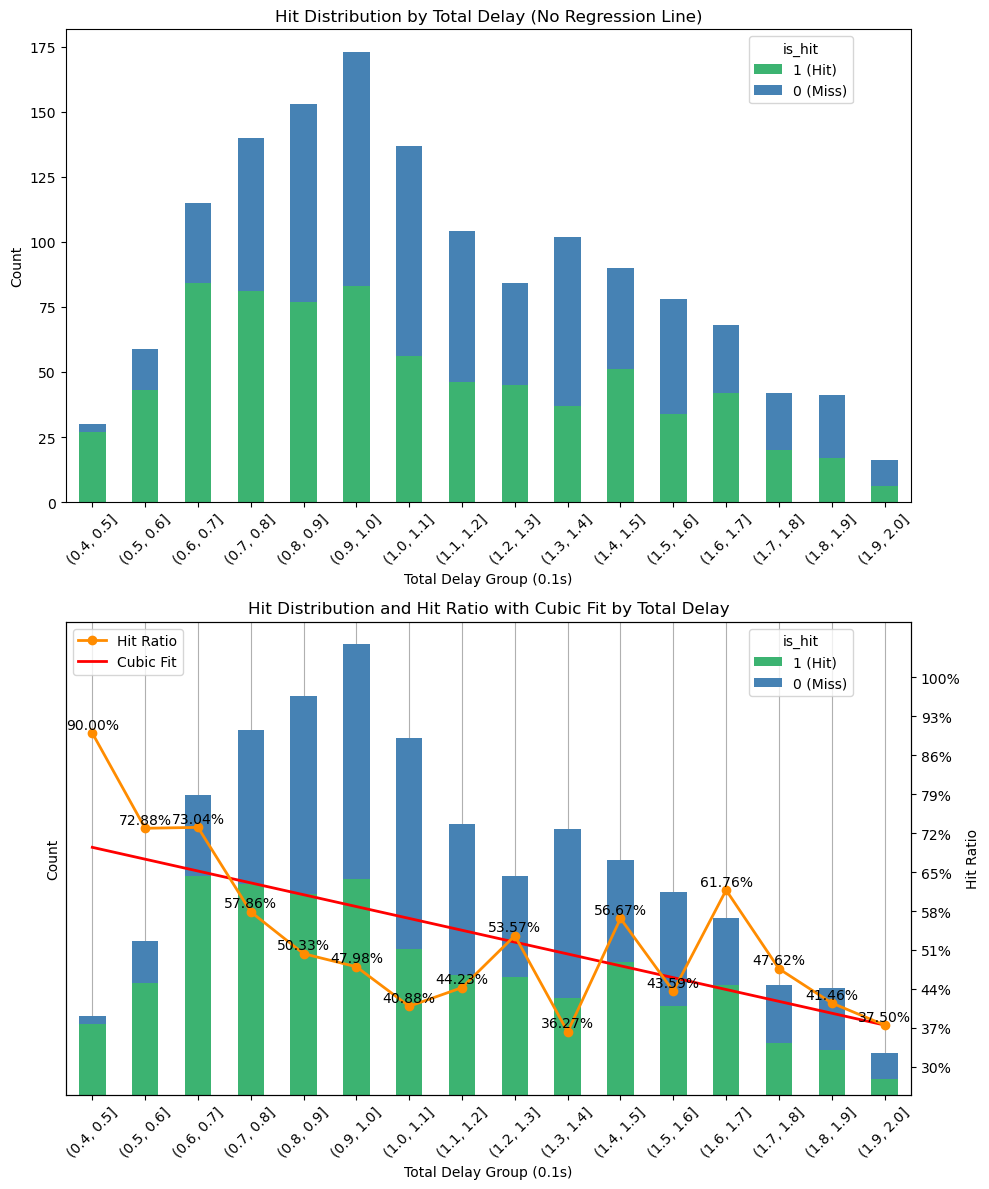

In [39]:
# total_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['total_delay'], bins=np.arange(0, df['total_delay'].max() + 0.1, 0.1))

# 특정 그룹을 제외하기 위해 필터링
excluded_intervals = [
    pd.Interval(0.3, 0.4, closed='right'),
    pd.Interval(2.0, 2.1, closed='right'),
    pd.Interval(2.1, 2.2, closed='right'),
    pd.Interval(2.2, 2.3, closed='right')
]

# 교차표 생성 후 필터링
cross_tab = pd.crosstab(df['delay_group'], df['is_hit'])
filtered_cross_tab = cross_tab[~cross_tab.index.isin(excluded_intervals)]

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
filtered_cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Total Delay (No Regression Line)')
axs[0].set_xlabel('Total Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(filtered_cross_tab)))
axs[0].set_xticklabels(filtered_cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 1차 함수 피팅
filtered_cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = filtered_cross_tab[1] / (filtered_cross_tab[1] + filtered_cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# poly fit
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 3차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Cubic Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Cubic Fit by Total Delay')
axs[1].set_xlabel('Total Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(filtered_cross_tab)))
axs[1].set_xticklabels(filtered_cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

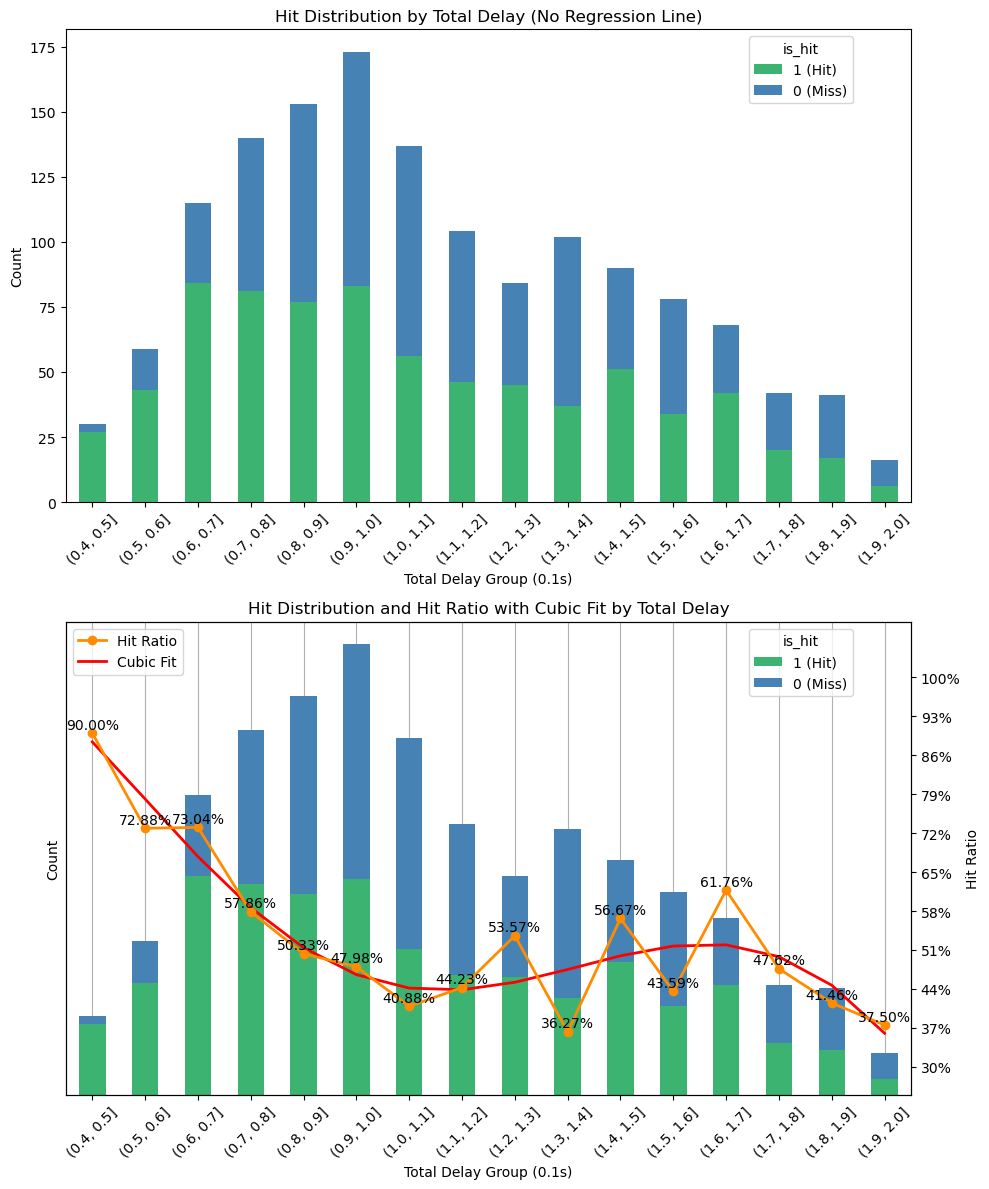

In [40]:
# total_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['total_delay'], bins=np.arange(0, df['total_delay'].max() + 0.1, 0.1))

# 특정 그룹을 제외하기 위해 필터링
excluded_intervals = [
    pd.Interval(0.3, 0.4, closed='right'),
    pd.Interval(2.0, 2.1, closed='right'),
    pd.Interval(2.1, 2.2, closed='right'),
    pd.Interval(2.2, 2.3, closed='right')
]

# 교차표 생성 후 필터링
cross_tab = pd.crosstab(df['delay_group'], df['is_hit'])
filtered_cross_tab = cross_tab[~cross_tab.index.isin(excluded_intervals)]

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
filtered_cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Total Delay (No Regression Line)')
axs[0].set_xlabel('Total Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(filtered_cross_tab)))
axs[0].set_xticklabels(filtered_cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 3차 함수 피팅
filtered_cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = filtered_cross_tab[1] / (filtered_cross_tab[1] + filtered_cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# poly fit
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 5)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 3차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Cubic Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Cubic Fit by Total Delay')
axs[1].set_xlabel('Total Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(filtered_cross_tab)))
axs[1].set_xticklabels(filtered_cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

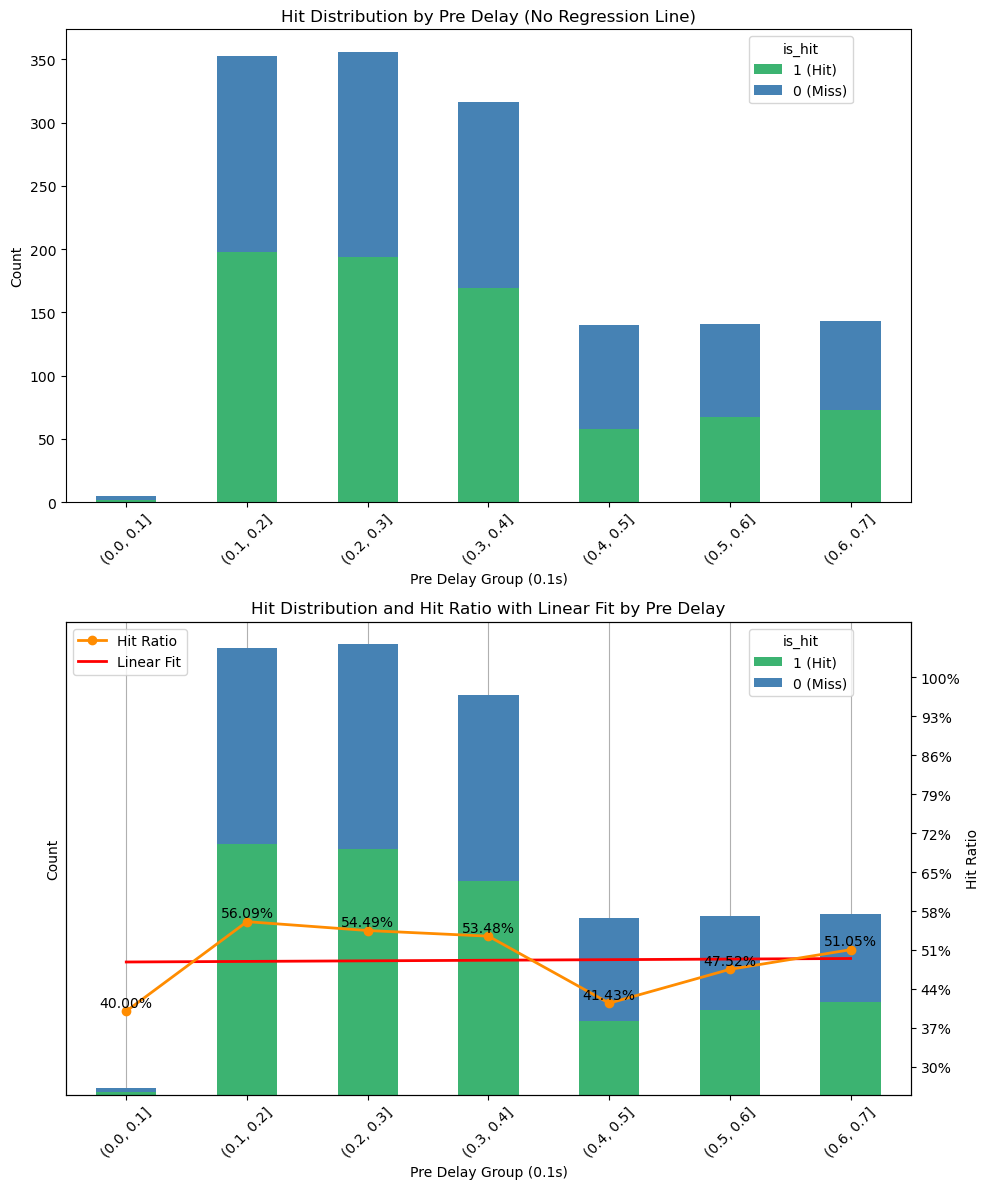

In [41]:
# pre_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['pre_delay'], bins=np.arange(0, df['pre_delay'].max() + 0.1, 0.1))

# 교차표 생성
cross_tab = pd.crosstab(df['delay_group'], df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Pre Delay (No Regression Line)')
axs[0].set_xlabel('Pre Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 1차 함수 피팅
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 1차 함수 피팅
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 1차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Linear Fit by Pre Delay')
axs[1].set_xlabel('Pre Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

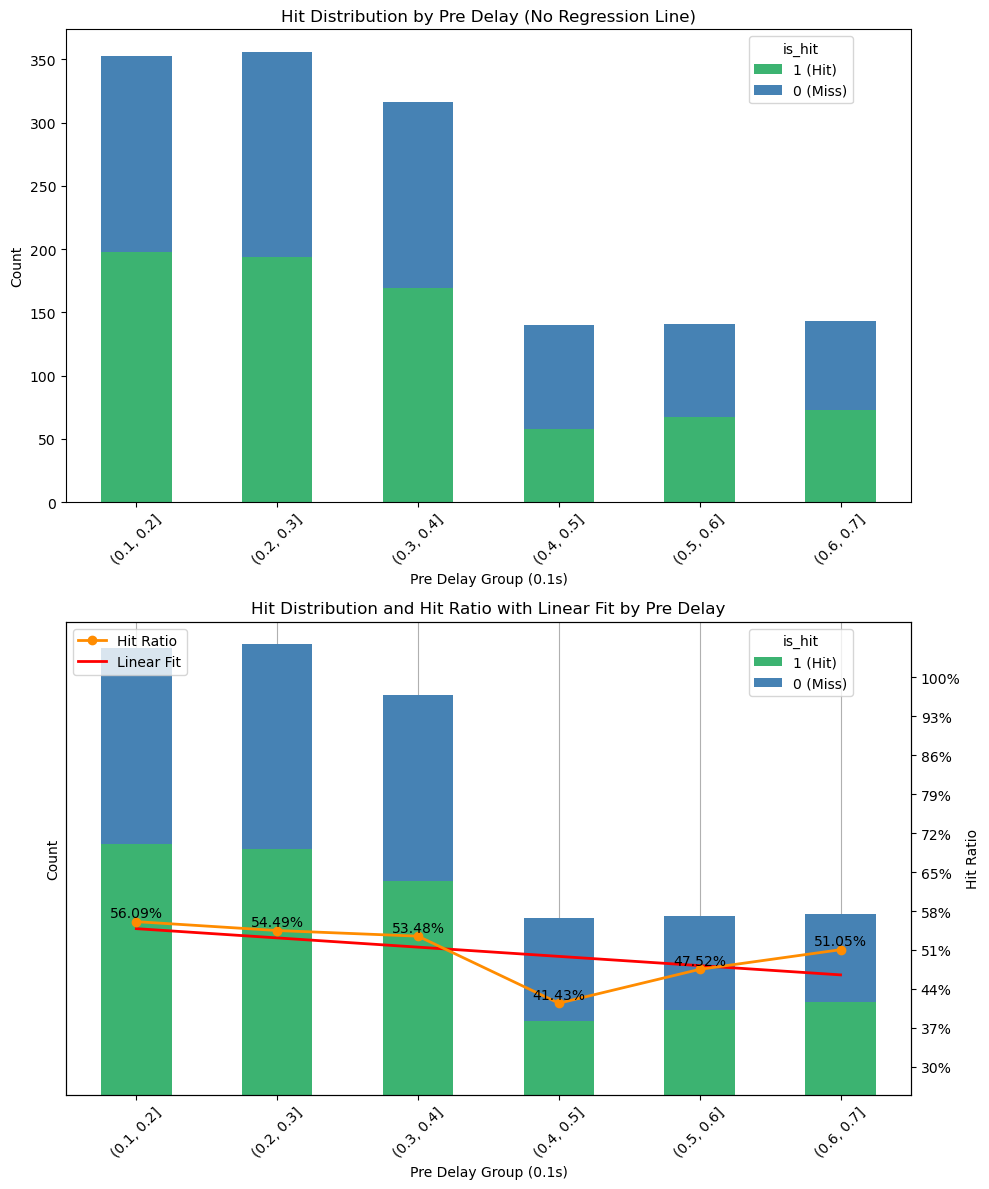

In [42]:
# pre_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['pre_delay'], bins=np.arange(0, df['pre_delay'].max() + 0.1, 0.1))

# 각 그룹의 데이터 개수를 계산하여 20 이하인 그룹을 필터링
group_counts = df['delay_group'].value_counts()
filtered_groups = group_counts[group_counts > 10].index
filtered_df = df[df['delay_group'].isin(filtered_groups)]

# 필터링된 데이터로 교차표 생성
cross_tab = pd.crosstab(filtered_df['delay_group'], filtered_df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Pre Delay (No Regression Line)')
axs[0].set_xlabel('Pre Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 1차 함수 피팅
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 1차 함수 피팅
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 1차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Linear Fit by Pre Delay')
axs[1].set_xlabel('Pre Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

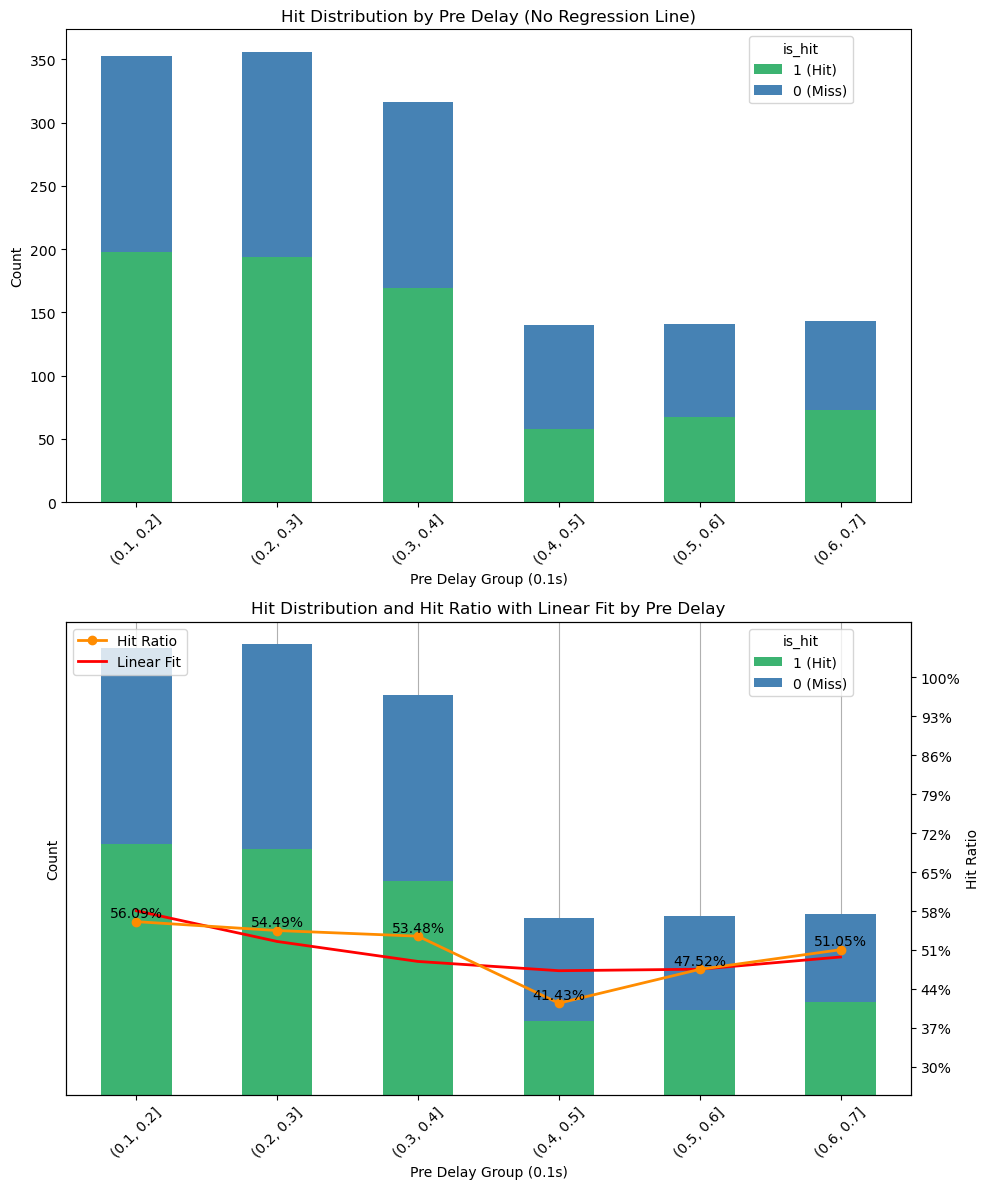

In [52]:
# pre_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['pre_delay'], bins=np.arange(0, df['pre_delay'].max() + 0.1, 0.1))

# 각 그룹의 데이터 개수를 계산하여 20 이하인 그룹을 필터링
group_counts = df['delay_group'].value_counts()
filtered_groups = group_counts[group_counts > 10].index
filtered_df = df[df['delay_group'].isin(filtered_groups)]

# 필터링된 데이터로 교차표 생성
cross_tab = pd.crosstab(filtered_df['delay_group'], filtered_df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Pre Delay (No Regression Line)')
axs[0].set_xlabel('Pre Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 1차 함수 피팅
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 2차 함수 피팅
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 2)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 1차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Linear Fit by Pre Delay')
axs[1].set_xlabel('Pre Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

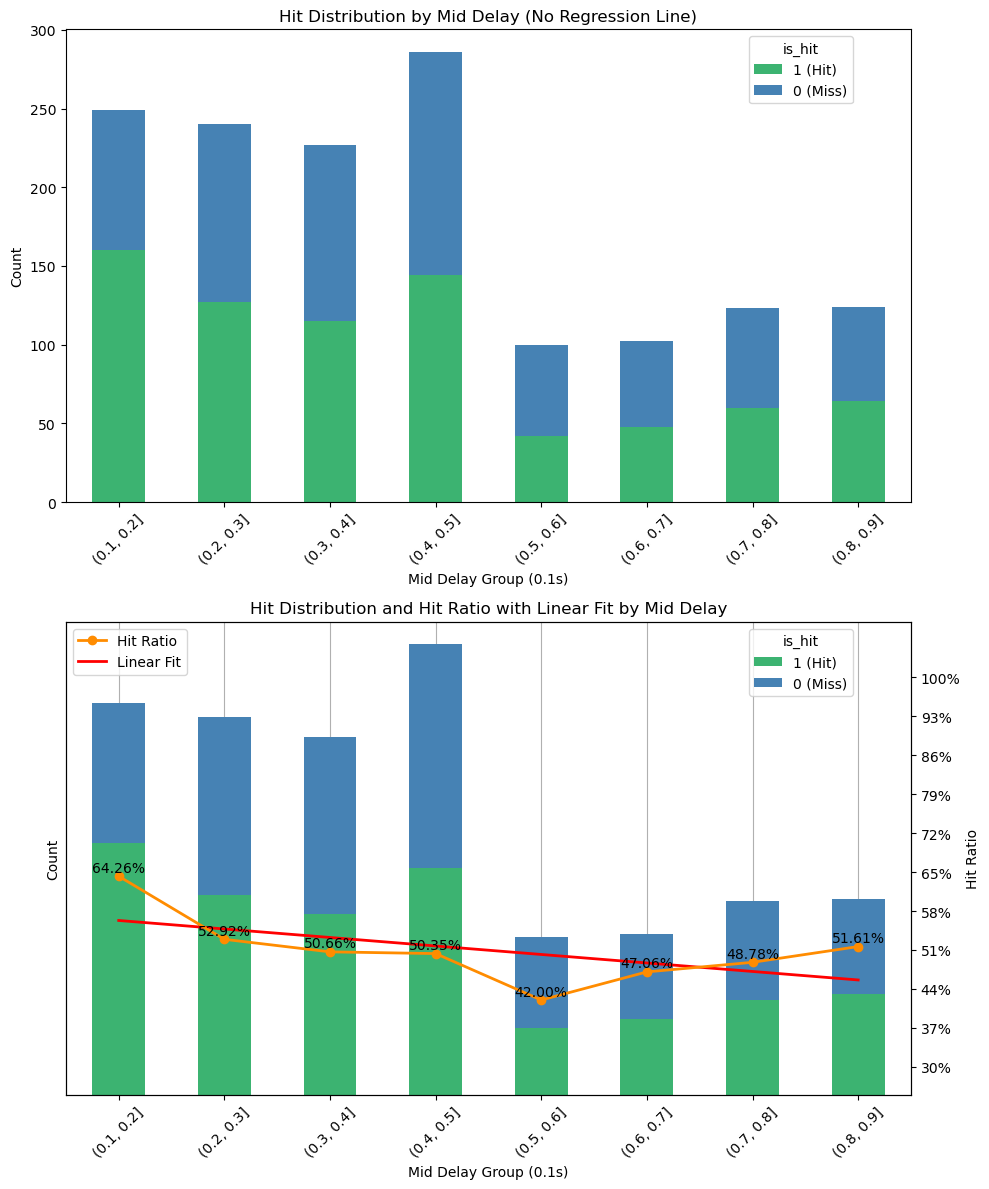

In [43]:
# mid_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['mid_delay'], bins=np.arange(0, df['mid_delay'].max() + 0.1, 0.1))

# 각 그룹의 데이터 개수를 계산하여 10 이하인 그룹을 필터링
group_counts = df['delay_group'].value_counts()
filtered_groups = group_counts[group_counts > 10].index
filtered_df = df[df['delay_group'].isin(filtered_groups)]

# 필터링된 데이터로 교차표 생성
cross_tab = pd.crosstab(filtered_df['delay_group'], filtered_df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Mid Delay (No Regression Line)')
axs[0].set_xlabel('Mid Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 1차 함수 피팅
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 1차 함수 피팅
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 1차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Linear Fit by Mid Delay')
axs[1].set_xlabel('Mid Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

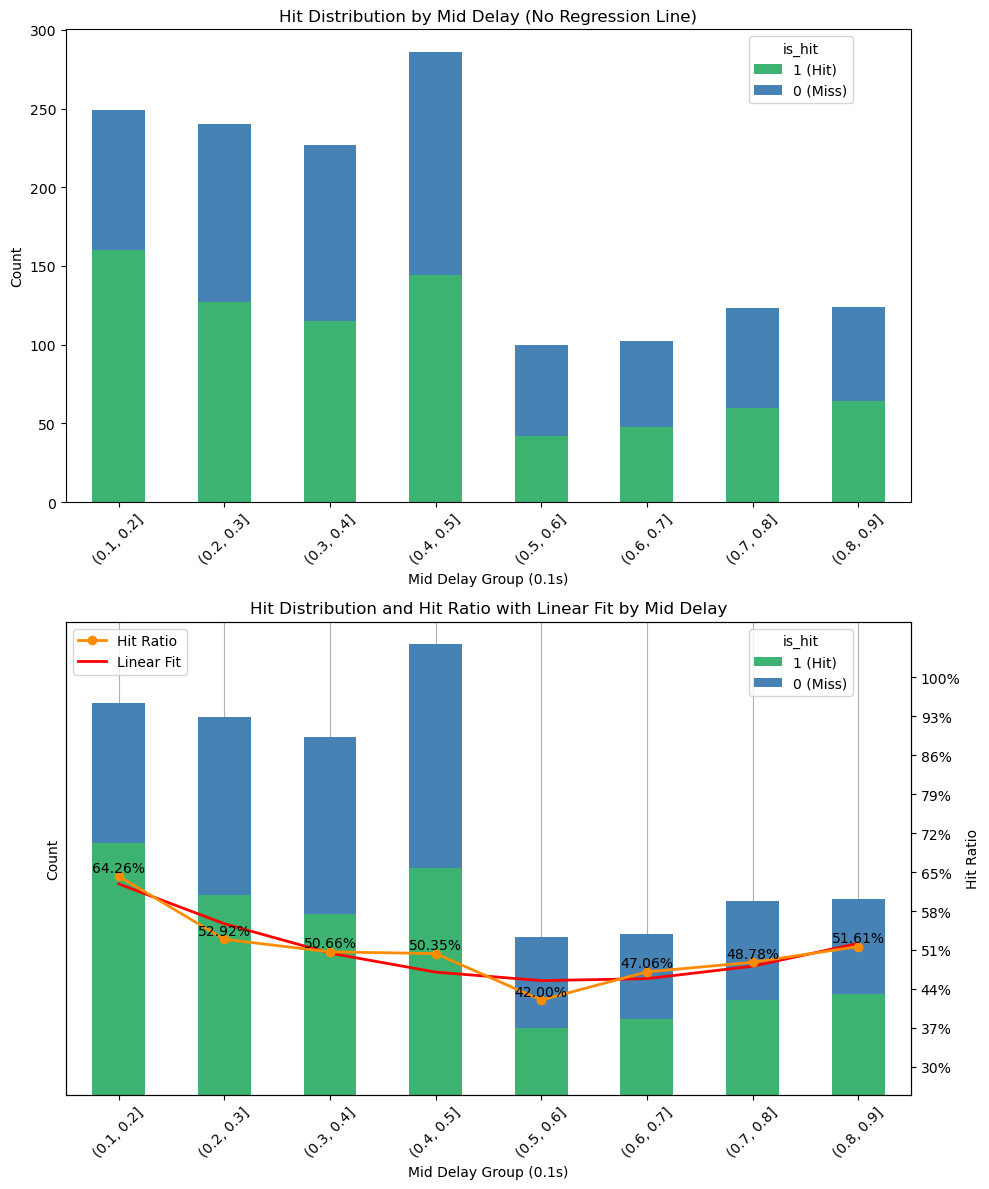

In [53]:
# mid_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['mid_delay'], bins=np.arange(0, df['mid_delay'].max() + 0.1, 0.1))

# 각 그룹의 데이터 개수를 계산하여 10 이하인 그룹을 필터링
group_counts = df['delay_group'].value_counts()
filtered_groups = group_counts[group_counts > 10].index
filtered_df = df[df['delay_group'].isin(filtered_groups)]

# 필터링된 데이터로 교차표 생성
cross_tab = pd.crosstab(filtered_df['delay_group'], filtered_df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Mid Delay (No Regression Line)')
axs[0].set_xlabel('Mid Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 1차 함수 피팅
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 1차 함수 피팅
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 2)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 1차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Linear Fit by Mid Delay')
axs[1].set_xlabel('Mid Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

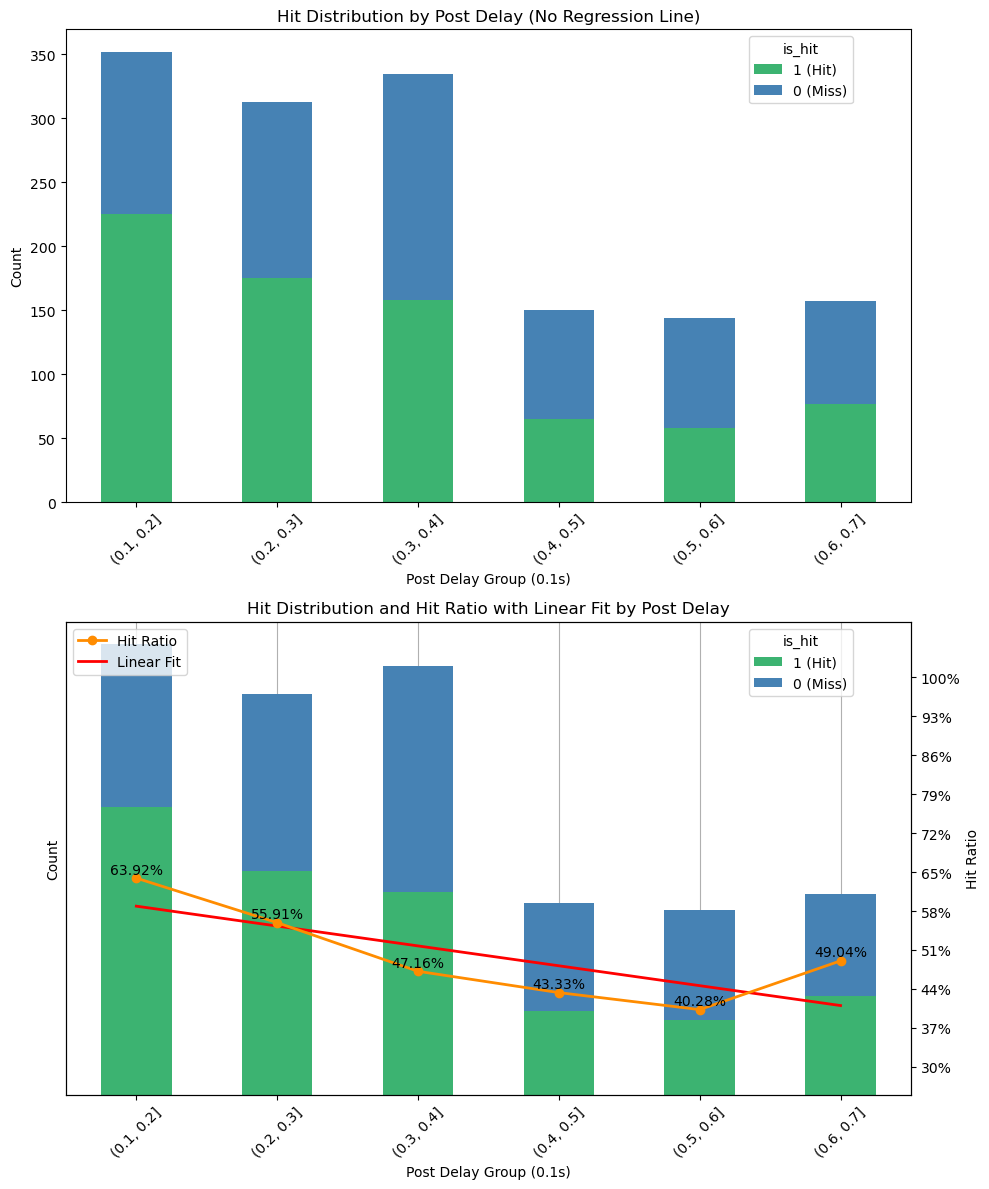

In [44]:
# post_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['post_delay'], bins=np.arange(0, df['post_delay'].max() + 0.1, 0.1))

# 각 그룹의 데이터 개수를 계산하여 10 이하인 그룹을 필터링
group_counts = df['delay_group'].value_counts()
filtered_groups = group_counts[group_counts > 10].index
filtered_df = df[df['delay_group'].isin(filtered_groups)]

# 필터링된 데이터로 교차표 생성
cross_tab = pd.crosstab(filtered_df['delay_group'], filtered_df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Post Delay (No Regression Line)')
axs[0].set_xlabel('Post Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 1차 함수 피팅
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 1차 함수 피팅
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 1)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 1차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Linear Fit by Post Delay')
axs[1].set_xlabel('Post Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

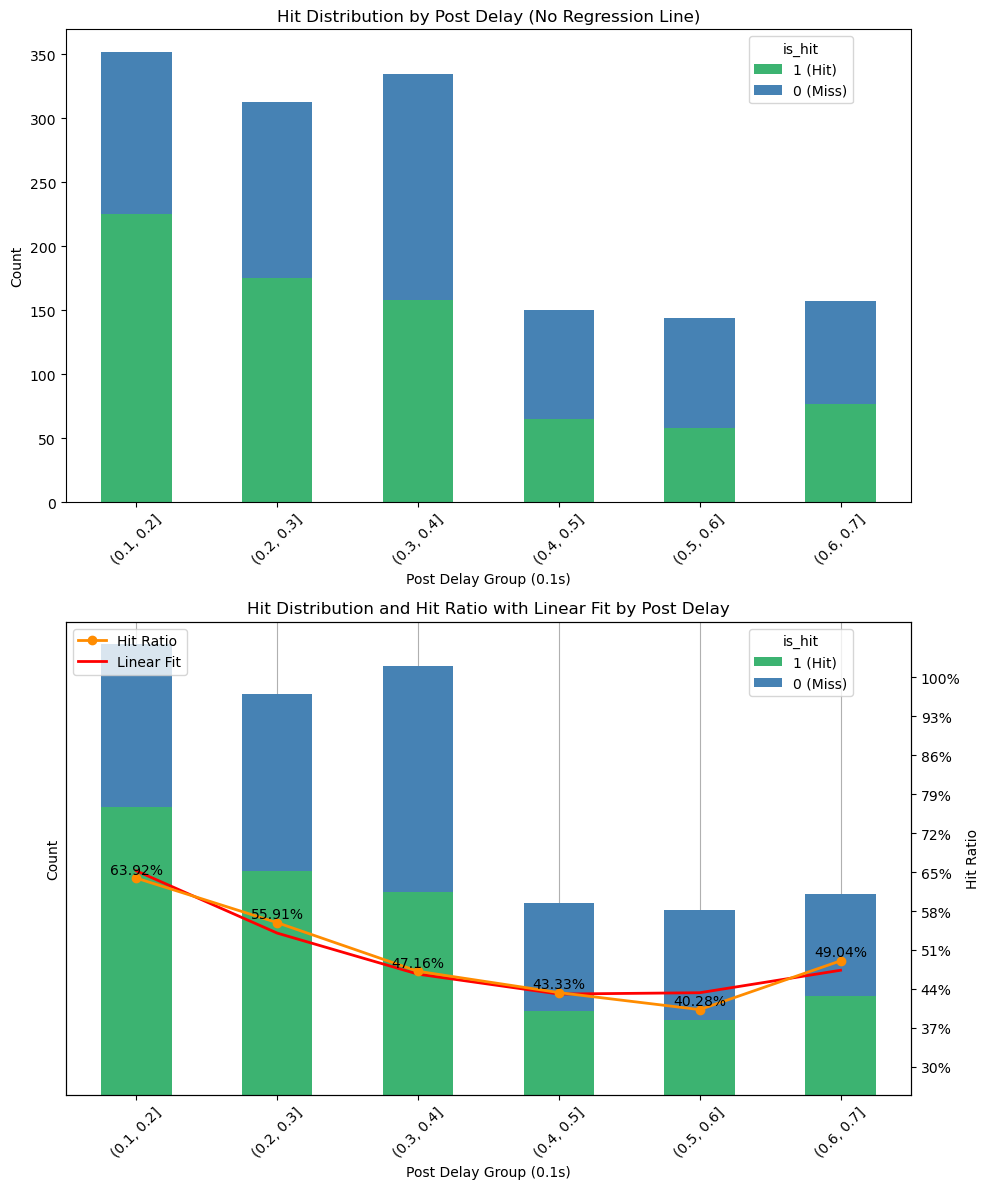

In [54]:
# post_delay를 0.1 단위로 그룹화
df['delay_group'] = pd.cut(df['post_delay'], bins=np.arange(0, df['post_delay'].max() + 0.1, 0.1))

# 각 그룹의 데이터 개수를 계산하여 10 이하인 그룹을 필터링
group_counts = df['delay_group'].value_counts()
filtered_groups = group_counts[group_counts > 10].index
filtered_df = df[df['delay_group'].isin(filtered_groups)]

# 필터링된 데이터로 교차표 생성
cross_tab = pd.crosstab(filtered_df['delay_group'], filtered_df['is_hit'])

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# 첫 번째 그래프: Linear Regression 선 없는 그래프
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[0], color=['mediumseagreen', 'steelblue'])
axs[0].set_title('Hit Distribution by Post Delay (No Regression Line)')
axs[0].set_xlabel('Post Delay Group (0.1s)')
axs[0].set_ylabel('Count')
axs[0].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[0].set_xticks(range(len(cross_tab)))
axs[0].set_xticklabels(cross_tab.index, rotation=45)

# 두 번째 그래프: Hit Ratio 그래프 추가 및 1차 함수 피팅
cross_tab[[1, 0]].plot(kind='bar', stacked=True, ax=axs[1], color=['mediumseagreen', 'steelblue'], zorder=2)

hit_ratios = cross_tab[1] / (cross_tab[1] + cross_tab[0])
hit_ratios = hit_ratios.reset_index(drop=True)

ax2 = axs[1].twinx()
ax2.plot(hit_ratios.index, hit_ratios, color='darkorange', marker='o', linestyle='-', linewidth=2, label='Hit Ratio', zorder=5)
ax2.set_ylim(0.25, 1.1)
ax2.set_ylabel('Hit Ratio', zorder=6)
ax2.set_yticks(np.linspace(0.30, 1.0, 11))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# 1차 함수 피팅
x_values = np.arange(len(hit_ratios))
y_values = hit_ratios.values
coefficients = np.polyfit(x_values, y_values, 2)
poly = np.poly1d(coefficients)
y_pred = poly(x_values)

# 피팅된 1차 함수 선 그리기
ax2.plot(hit_ratios.index, y_pred, color='red', linestyle='-', linewidth=2, label='Linear Fit', zorder=4)

# Hit Ratio 축의 그리드를 끄고, axs[1]에서 그리드를 그리도록 설정
ax2.grid(False)
axs[1].grid(True, zorder=0)  # 그리드를 막대 뒤로 설정

# 각 그룹에 대한 hit ratio 값을 hit ratio 점 아래에 검은 텍스트로 추가
for i in range(len(hit_ratios)):
    ax2.text(i, hit_ratios[i] + 0.008, f'{hit_ratios[i]:.2%}', ha='center', color='black', zorder=7)

axs[1].set_title('Hit Distribution and Hit Ratio with Linear Fit by Post Delay')
axs[1].set_xlabel('Post Delay Group (0.1s)')
axs[1].set_ylabel('Count')
axs[1].legend(title='is_hit', labels=['1 (Hit)', '0 (Miss)'], bbox_to_anchor=(0.8, 1.0), loc='upper left')
axs[1].set_xticks(range(len(cross_tab)))
axs[1].set_xticklabels(cross_tab.index, rotation=45)
axs[1].yaxis.set_ticks([])  # 왼쪽 카운트 틱 제거

ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [45]:
df = df.drop(columns=['delay_group'])

df

,is_hit,is_visualization,is_dash,start_distance,start_delay,pre_delay,mid_delay,post_delay,attack_size,attack_pattern,attack_count,total_delay
0,0,1,0,724,0.605,0.206,0.432,0.171,209,5,4,0.809
1,1,0,1,834,0.201,0.167,0.220,0.319,189,1,5,0.706
2,1,0,0,745,0.539,0.234,0.835,0.415,190,2,6,1.484
3,0,1,0,826,0.333,0.368,0.792,0.188,187,4,7,1.348
4,1,0,1,1132,0.768,0.632,0.494,0.350,215,3,8,1.476
...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1,1,0,781,0.682,0.252,0.114,0.103,189,5,3,0.469
1450,1,1,0,1464,0.659,0.108,0.764,0.162,268,3,4,1.034
1451,0,0,0,1029,0.343,0.264,0.241,0.375,210,1,5,0.880
1452,1,0,0,529,0.552,0.606,0.539,0.322,242,2,6,1.467


C:\Users\hyjin\AppData\Local\Temp\ipykernel_7780\4050568735.py:21: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
C:\Users\hyjin\AppData\Local\Temp\ipykernel_7780\4050568735.py:21: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  plt.tight_layout()
C:\Users\hyjin\AppData\Local\Temp\ipykernel_7780\4050568735.py:21: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  plt.tight_layout()
C:\Users\hyjin\AppData\Local\Temp\ipykernel_7780\4050568735.py:21: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
C:\Users\hyjin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hyjin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from

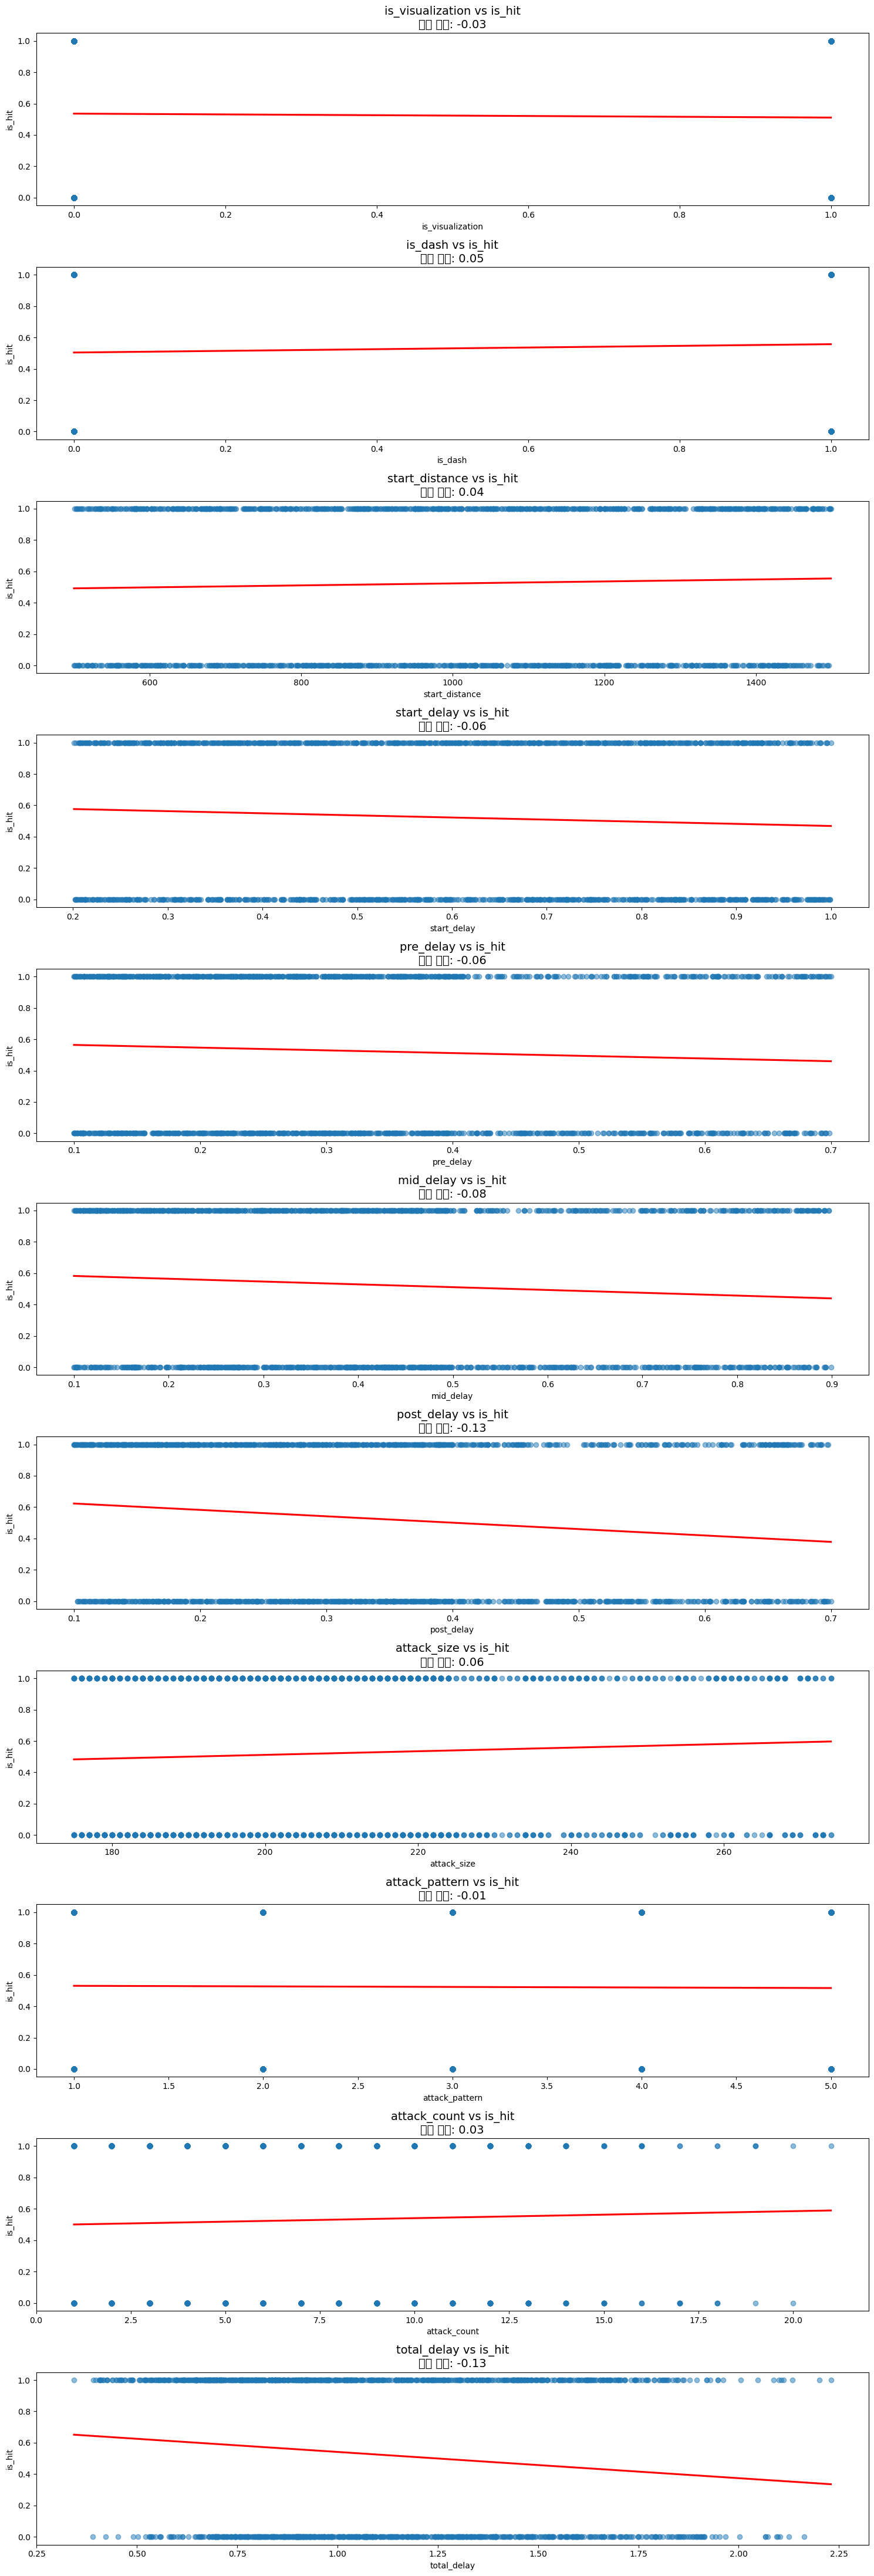

In [47]:
import seaborn as sns

# is_hit 열을 종속 변수(Y)로 설정
Y = df['is_hit']

# 나머지 열들을 독립 변수(X features)로 설정
X = df.drop(columns=['is_hit'])

# 그래프 크기 설정
plt.figure(figsize=(15, X.shape[1] * 4))

# 각 변수에 대해 2차원 산점도 및 상관 계수 시각화
for i, column in enumerate(X.columns):
    plt.subplot(X.shape[1], 1, i + 1)
    sns.regplot(x=X[column], y=Y, ci=None, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
    correlation = X[column].corr(Y)
    plt.title(f'{column} vs is_hit\n상관 계수: {correlation:.2f}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('is_hit')

plt.tight_layout()
plt.show()

In [48]:
correlations = X.apply(lambda x: x.corr(Y))
max_correlation_column = correlations.abs().idxmax()
max_correlation_value = correlations[max_correlation_column]

# 상관 계수 절대값 기준으로 상위 5개의 컬럼 선택
top_5_correlations = correlations.abs().nlargest(5)

# 결과 출력
print("상관 계수 절대값 상위 5개 컬럼:")
print(top_5_correlations)

for column in top_5_correlations.index:
    print(f"\n컬럼: {column}")
    print(f"상관 계수 값: {correlations[column]:.4f}")

상관 계수 절대값 상위 5개 컬럼:
post_delay     0.134439
total_delay    0.128142
mid_delay      0.079209
start_delay    0.061678
attack_size    0.058103
dtype: float64

컬럼: post_delay
상관 계수 값: -0.1344

컬럼: total_delay
상관 계수 값: -0.1281

컬럼: mid_delay
상관 계수 값: -0.0792

컬럼: start_delay
상관 계수 값: -0.0617

컬럼: attack_size
상관 계수 값: 0.0581
